1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

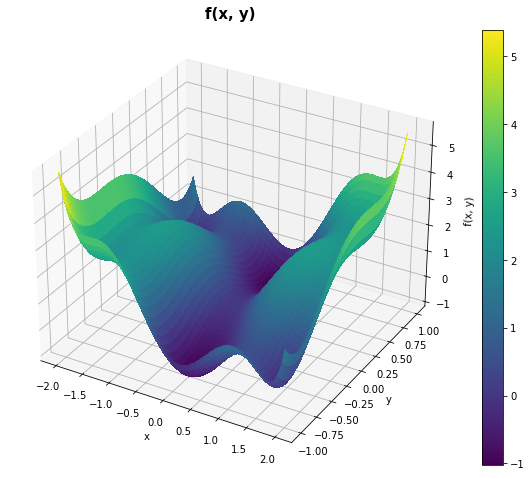

In [72]:
from scipy import optimize
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return (4-2.1*x[0]**2+x[0]**4/3)*x[0]**2 + x[0]*x[1] + (4*x[1]**2-4)*x[1]**2

## PLOT
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 10))

x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)
x, y = np.meshgrid(x, y)
z = f([x, y])

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.viridis, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.8)

# Labels
ax.set_title('f(x, y)', fontweight = 'bold', fontsize = 15)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

plt.show()


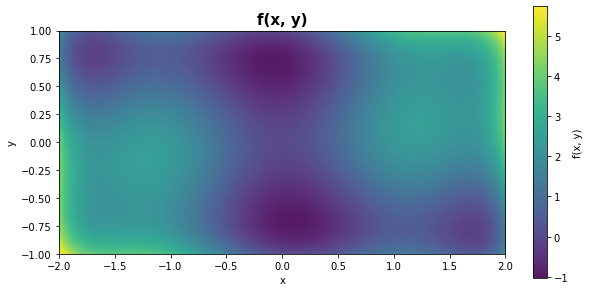

In [102]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.imshow(z, extent=(-2, 2, -1, 1), cmap=cm.viridis, alpha=0.9, origin='lower')
plt.xlabel('x')
plt.ylabel('y')
plt.title('f(x, y)', fontweight = 'bold', fontsize = 15)

plt.colorbar(label = 'f(x, y)');

In [118]:
import pandas as pd
from IPython.display import display

starting_guesses = [[-1.5, 0], [1.5, 0], [0, -1], [0, 1]]
solutions = [optimize.minimize(f, x0 = i) for i in starting_guesses]

min_loc = {'x':[solution['x'][0] for solution in solutions], 
           'y':[solution['x'][1] for solution in solutions], 
           'f':[solution['fun'] for solution in solutions]}

minima = pd.DataFrame(min_loc)
print('Local minima:')
display(minima)

print('Global minima:')
display(minima.iloc[2:, :])


Local minima:


,x,y,f
0,-1.703607,0.796084,-0.215464
1,1.703607,-0.796084,-0.215464
2,0.089842,-0.712656,-1.031628
3,-0.089842,0.712656,-1.031628


Global minima:


,x,y,f
2,0.089842,-0.712656,-1.031628
3,-0.089842,0.712656,-1.031628


In [124]:
solution_zero = optimize.minimize(f, [0, 0], method = 'CG')
print(solution_zero)

# todo: commentare i risultati usando diversi methods e provare a usare basinhooping

     fun: 0.0
     jac: array([ 5.96046448e-08, -5.96046448e-08])
 message: 'Optimization terminated successfully.'
    nfev: 3
     nit: 0
    njev: 1
  status: 0
 success: True
       x: array([0., 0.])


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

,Month,T max,T min
0,Jan,17,-62
1,Feb,19,-59
2,Mar,21,-56
3,April,28,-46
4,May,33,-32
5,June,38,-18
6,July,37,-9
7,Aug,37,-13
8,Sept,31,-25
9,Oct,23,-46


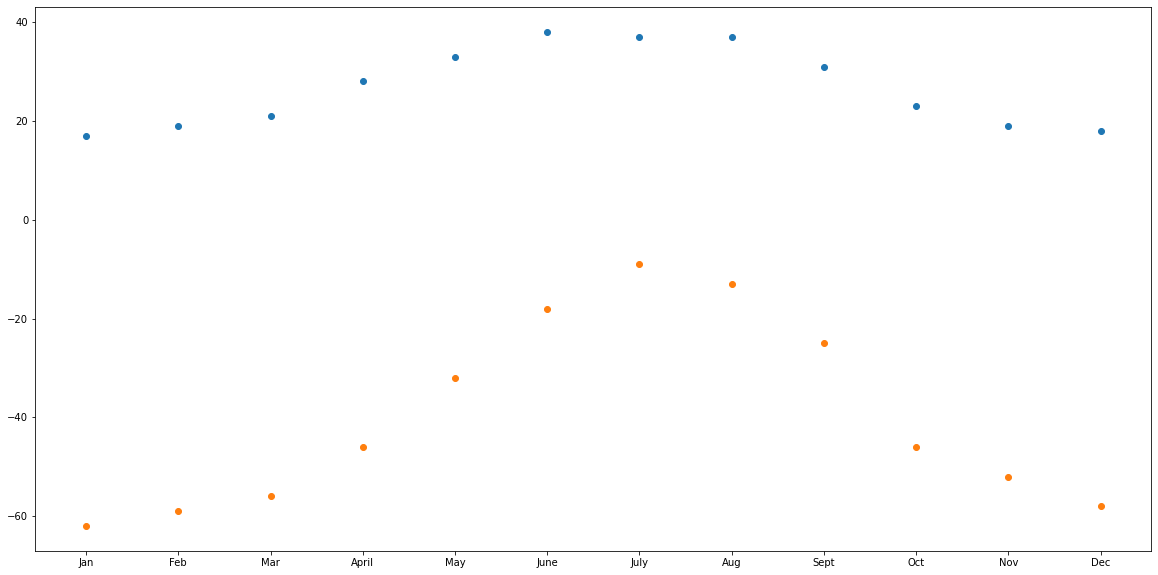

In [132]:
months = ['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
months_labels = range(1,13)
Tmax = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
Tmin = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

dataset = pd.DataFrame({'Month': months, 'T max': Tmax, 'T min': Tmin})
display(dataset)

fig = plt.subplots(figsize=(20, 10))
plt.scatter(months, Tmax)
plt.scatter(months, Tmin);


3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.